In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from tqdm.auto import tqdm
import math
import random
from matplotlib import pyplot as plt
from scipy.spatial import distance

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.16 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.18 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.21 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t −  α(-y_n + σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [11]:
import math
def logloss(actual, predicted, eps = 1e-15):
    '''
    log loss for lists 
    '''
    p = np.clip(predicted, eps, 1 - eps);ans=[] #http://wiki.fast.ai/index.php/Log_Loss
    for i in range(len(list(actual))):
        ans.append((actual[i] * math.log(p[i])) + (1 - actual[i]) * math.log(1 - p[i]))
    return sum(ans)/len(actual)
#https://stackoverflow.com/questions/3985619/how-to-calculate-a-logistic-sigmoid-function-in-python
def sigmoid(w,x,b):
    '''
    Sigmoid function
    '''
    return 1/(1+math.exp(-(np.dot(x,w)+b)))
def logloss1(true_label, predicted, eps=1e-15):
    '''
    log loss for singleton arrays
    '''
    p = np.clip(predicted, eps, 1 - eps)
    if true_label == 1:
        return -math.log(p)
    else:
        return -math.log(1 - p)

Initial Log loss train: 9.992007221626415e-16
Initial Log loss test: 9.992007221626415e-16


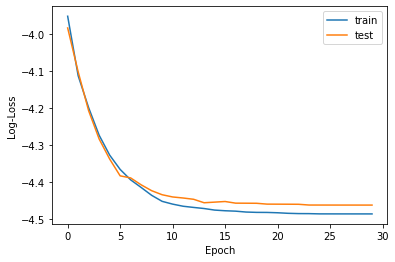

In [32]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
epochs = 30
def pred(w,x,b): 
    '''
    this function returns (w^T X) + b value
    '''
    val = np.matmul(np.transpose(w),x) + b 
    return val
#initial log_loss
init_loss_train= logloss1(y_train[0],pred(w,X_train[0],b));  
init_loss_test = logloss1(y_test[0],pred(w,X_test[0],b));
print("Initial Log loss train:",init_loss_train) #printing initial loss
print("Initial Log loss test:",init_loss_test)
loss_train = [init_loss_train]; loss_test = [init_loss_test];
for i in range(epochs):
    for j in range(N):
        w = ((1 - ((alpha * eta0)/ N) ) * w + (alpha * (X_train[j]) * ((y_train[j] - sigmoid(w, X_train[j], b))))) #from pdf
        b = (b - eta0*( (-1)* y_train[j] + sigmoid(w,X_train[j],b))) #from explanation of assignment video
    loss_train.append(logloss(y_train,[pred(w,X_train[k],b) for k in range(N)]))
    loss_test.append(logloss(y_test,[pred(w,X_test[k1],b) for k1 in range(len(X_test))]))

loss_train.pop(0) # remoivng initial loss 
loss_test.pop(0) 
plt.plot(np.asarray(range(epochs)),np.asarray(loss_train),label = 'train') #plotting of loss versus epoch
plt.plot(np.asarray(range(epochs)),np.asarray(loss_test),label = 'test')
plt.ylabel('Log-Loss') # labelling the y-axis
plt.xlabel('Epoch') #labelling the x-axis
# giving a title to my graph 
plt.legend() 
# function to show the plot 
plt.show() 

In [34]:
np.set_printoptions(suppress=True)
np.asarray(np.round(w,8))
final_b = np.round(b,8)
print(final_w)
print(final_b)

[-0.42973163  0.19301625 -0.14845524  0.33810352 -0.22119529  0.56991552
 -0.44518387 -0.08992743  0.2217907   0.17379468  0.19871487 -0.00054901
 -0.08129786  0.33909308  0.02297537]
-0.89173999


In [19]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
clf.coef_, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 array([-0.8531383]))

In [35]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.95224
0.95


In [36]:
### GOAL of the task: 
dst = abs(final_w - clf.coef_) 
print(dst)

[[0.00636471 0.00754059 0.00013511 0.00334055 0.01300858 0.00974973
  0.00724095 0.0041607  0.0125175  0.00704658 0.00166296 0.00476816
  0.00169416 0.00056506 0.00030816]]


### Conclusion:
1. The plot above shows that log loss decreases with increase in epoch number. 
2. Initial Loss on train data: 9.992007221626415e-16
   Initial Loss on test data: 9.992007221626415e-16
3. Accuracy score of train was obtained to be 0.95224 or 95.224% and that of test obtained was 0.95 or 95%
4. The 'dst' variable shows us that the distance between the weight vector obtained from task calculations and sklearn implementation is very less for each feature. 
